In [431]:
from GoogleNews import GoogleNews

import urllib.request
from bs4 import BeautifulSoup

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import requests
import multiprocessing
import time

import numpy as np

In [397]:
symbol = 'HEXO'

In [413]:
googlenews = GoogleNews()
googlenews = GoogleNews(start='06/15/2020', end='06/18/2020', lang='en') #period='d'

googlenews.search(symbol)
results = googlenews.result()

DICT = {}
for news in results:
    DICT[news['title']] = news['link']
    
titles = [i for i in DICT.keys()]
links = [i for i in DICT.values()]

In [414]:
body = genBody(links)
allText = genAllText(body)
pos,neg,neu,com,count = measureSentiment(allText)
pos_,neg_,neu_,com_ = av_sentiment(pos,neg,neu,com,count)

Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!


In [415]:
print(f'Positive: {pos_}\nNegative: {neg_}\nNeutral: {neu_}\n\nCompound (given): {com_}\nCompound (calculated): {(pos_-neg_)/neu_}')

Positive: 0.05720000000000001
Negative: 0.0312
Neutral: 0.9115000000000002

Compound (given): 0.33759999999999996
Compound (calculated): 0.028524410312671424


In [405]:
import matplotlib.pyplot as plt

In [411]:
def genCalList(start,end):
    start_d = int(start[3:5])
    end_d = int(end[3:5])
    dif = end_d - start_d
    
    calList = []
    for i in range(dif+1):
        calList += [start[0:3]+formatDay(str(start_d+i))+start[5:]]
        
    return calList
        
    
def formatDay(day):
    if int(day) < 10:
        return f'0{day}'
    return day

In [436]:
symbol = 'NKLA'

start='06/01/2020'
end='06/19/2020'
calList = genCalList(start,end)

posL,negL,neuL,comL,calcL = [],[],[],[],[]

googlenews = GoogleNews()

for date in calList:
    print('\n',date)
    googlenews = GoogleNews(start=date, end=date, lang='en') #period='d'
    googlenews.search(symbol)
    results = googlenews.result()

    DICT = {}
    for news in results:
        DICT[news['title']] = news['link']
    titles = [i for i in DICT.keys()]
    links = [i for i in DICT.values()]
    
    body = genBody(links)
    allText = genAllText(body)
    
    pos,neg,neu,com,count = measureSentiment(allText)
    pos_,neg_,neu_,com_ = av_sentiment(pos,neg,neu,com,count)
    try:
        calc_ = (pos_-neg_)/neu_
    except:
        calc_ = 0.0
    
    posL += [pos_]
    negL += [neg_]
    neuL += [neu_]
    comL += [com_]
    calcL += [calc_]


 06/01/2020
Requests success!
Requests success!
Requests success!
Requests success!

 06/02/2020
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!

 06/03/2020
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!

 06/04/2020
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!

 06/05/2020
Requests success!
Requests success!
timed out...
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!

 06/06/2020
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!

 06/07/2020
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!

 06/08/2020
Requests success!
Requests success!
Requests success!
R

In [500]:
googlenews = GoogleNews(start="06/22/2020", end="06/22/2020", lang='en') #period='d'
googlenews.search('sony')
googlenews.getpage(1)
results = googlenews.result()
googlenews.clear()

In [501]:
results

[{'title': 'Sony WH-CH710N review: Just right',
  'media': 'India Today',
  'date': '2 hours ago',
  'desc': 'The Sony WH-CH710N costs Rs 9,990. Buyers will be impressed with an overall balanced audio profile. Battery life on the WH-CH710N is beyond amazing.',
  'link': 'https://www.indiatoday.in/technology/reviews/story/sony-wh-ch710n-review-just-right-1691610-2020-06-22',
  'img': 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRHTVQQk9HDEWV074XSXg-KYH-gj3OXAU_aG2LPIRdRxkw8ZXJgBqTziIG0jDbAcdF1Hwr14RE&s'},
 {'title': 'PS5 price and pre-orders: how much will the PlayStation 5 cost?',
  'media': 'What Hi-Fi?',
  'date': '4 hours ago',
  'desc': 'Sony may have left us guessing the PlayStation 5 price, but history is on our side. Both the original PlayStation and PS2 launched at £299/$299 in 1994 and 2000\xa0...',
  'link': 'https://www.whathifi.com/advice/ps5-price-and-pre-orders-how-much-will-the-playstation-5-cost',
  'img': 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9G

In [502]:
googlenews = GoogleNews(start="06/22/2020", end="06/22/2020", lang='en') #period='d'
googlenews.search('sony')
googlenews.getpage(2)
results1 = googlenews.result()
googlenews.clear()

In [503]:
results1

[{'title': 'First real image of Sony PlayStation 5 hit the web – feel the size',
  'media': 'Gizchina.com (blog)',
  'date': '8 hours ago',
  'desc': 'About a week ago, Sony revealed more information about the upcoming PlayStation 5. Amongst other things, the company showed us what this console will look\xa0...',
  'link': 'https://www.gizchina.com/2020/06/22/first-real-image-of-sony-playstation-5-hit-the-web-feel-the-size/',
  'img': 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ61W3K1LHmiY2lyRruzs-vx2_Yc1vsuwNR7TuE8tvme-niYAwPj7sBTnjmWbAtBmaa01wGn1GA&s'},
 {'title': 'Sony WH-CH710N review: Just right',
  'media': 'India Today',
  'date': '2 hours ago',
  'desc': 'The Sony WH-CH710N costs Rs 9,990. Buyers will be impressed with an overall balanced audio profile. Battery life on the WH-CH710N is beyond amazing.',
  'link': 'https://www.indiatoday.in/technology/reviews/story/sony-wh-ch710n-review-just-right-1691610-2020-06-22',
  'img': 'https://encrypted-tbn0.gstatic.com/imag

In [529]:
names = "donald trump"
pageCount = 10
start="05/23/2020"
end="05/23/2020"

RESULT = {}

for name in names.split(','):
    for page in range(1,pageCount+1):
        t = time.time()
        
        googlenews = GoogleNews(start=start, end=end, lang='en')
        googlenews.search(name)
        googlenews.getpage(page)
        results = googlenews.result()
        googlenews.clear()
        
        for res in results:
            RESULT[res['title']] = res['link']
            
        print(f"Page: {page}. Name: {name}. t={round(time.time()-t,2)}s")
    print('\n')

Page: 1. Name: donald trump. t=2.4s
Page: 2. Name: donald trump. t=2.19s
Page: 3. Name: donald trump. t=2.08s
Page: 4. Name: donald trump. t=2.41s
Page: 5. Name: donald trump. t=2.29s
Page: 6. Name: donald trump. t=2.31s
Page: 7. Name: donald trump. t=2.27s
Page: 8. Name: donald trump. t=1.59s
Page: 9. Name: donald trump. t=1.49s
Page: 10. Name: donald trump. t=1.49s




In [531]:
len(RESULT)

66

In [644]:
googlenews = GoogleNews()

start="06/10/2020"
end="06/20/2020"

calList = genCalList(start,end)
posL,negL,neuL,comL,calcL = [],[],[],[],[]

names = "donald trump"
synonyms = "president"
pageCount = 10
ALL_RESULT = {}


t = time.time()

for date in calList:
    RESULT = {}
    print(f'\n\n{date}')
    for name in names.split(','):
        for page in range(1,pageCount+1):
            t1 = time.time()

            googlenews = GoogleNews(start=date, end=date, lang='en')
            googlenews.search(name)
            googlenews.getpage(page)
            results = googlenews.result()[10:]
            googlenews.clear()

            for res in results:
                try:
                    tmp = ALL_RESULT[res['title']]
                    print('--- already exists ---')
                except:
                    ALL_RESULT[res['title']] = res['link']
                    RESULT[res['title']] = res['link']

            print(f"Page: {page}. Name: {name}. t={round(time.time()-t1,2)}s")
        print('\n')
        
    titles = [i for i in RESULT.keys()]
    links = [i for i in RESULT.values()]
    
    body = genBody(links)
    if len(synonyms) > 0:
        allWords = names + ',' + synonyms
    else:
        allWords = names
        
    print('\nFetching <p> text...')
    allText = genAllText(body,allWords)
    
    print('Sentiment analysis...')
    pos,neg,neu,com,count = measureSentiment(allText)
    pos_,neg_,neu_,com_ = av_sentiment(pos,neg,neu,com,count)
    try:
        calc_ = (pos_-neg_)/neu_
    except:
        calc_ = 0.0
    
    posL += [pos_]
    negL += [neg_]
    neuL += [neu_]
    comL += [com_]
    calcL += [calc_]
    
    
print(time.time()-t)



06/10/2020
Page: 1. Name: donald trump. t=2.72s
Page: 2. Name: donald trump. t=3.38s
Page: 3. Name: donald trump. t=2.19s
Page: 4. Name: donald trump. t=2.63s
Page: 5. Name: donald trump. t=2.24s
Page: 6. Name: donald trump. t=2.49s
Page: 7. Name: donald trump. t=2.02s
Page: 8. Name: donald trump. t=2.14s
Page: 9. Name: donald trump. t=2.19s
Page: 10. Name: donald trump. t=2.1s


Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Req

Requests success!
Requests success!

Fetching <p> text...
Sentiment analysis...
Groups: 100
done-1
done-2
done-3
done-4
done-5
done-6
done-7
done-8
done-9
done-10
done-11
done-12
done-13
done-14
done-15
done-16
done-17
done-18
done-19
done-20
done-21
done-22
done-23
done-24
done-25
done-26
done-27
done-28
done-29
done-30
done-31
done-32
done-33
done-34
done-35
done-36
done-37
done-38
done-39
done-40
done-41
done-42
done-43
done-44
done-45
done-46
done-47
done-48
done-49
done-50
done-51
done-52
done-53
done-54
done-55
done-56
done-57
done-58
done-59
done-60
done-61
done-62
done-63
done-64
done-65
done-66
done-67
done-68
done-69
done-70
done-71
done-72
done-73
done-74
done-75
done-76
done-77
done-78
done-79
done-80
done-81
done-82
done-83
done-84
done-85
done-86
done-87
done-88
done-89
done-90
done-91
done-92
done-93
done-94
done-95
done-96
done-97
done-98
done-99
done-100


06/13/2020
Page: 1. Name: donald trump. t=3.74s
Page: 2. Name: donald trump. t=2.96s
--- already exists ---
Page: 

Requests success!
Requests success!
Requests success!
Requests success!
timed out...
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
timed out...
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!

Fetching <p> text...
Sentiment analysis...
Groups: 96
done-1
done-2
done-3
done-4
done-5
do

Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests success!
Requests s

In [646]:
len(ALL_RESULT)

1065

In [647]:
posL

[0.06598000000000002,
 0.06903000000000001,
 0.06827,
 0.07742105263157896,
 0.08413131313131314,
 0.05898958333333332,
 0.06296969696969695,
 0.06893877551020408,
 0.0705204081632653,
 0.06694949494949495,
 0.060148148148148124]

In [648]:
negL

[0.06445,
 0.07173000000000002,
 0.06932999999999997,
 0.07085263157894738,
 0.06315151515151513,
 0.06743749999999998,
 0.06930303030303032,
 0.06991836734693878,
 0.06434693877551019,
 0.07014141414141414,
 0.04845679012345679]

In [649]:
neuL

[0.7995500000000001,
 0.7592299999999997,
 0.7423800000000002,
 0.7780105263157896,
 0.7720000000000002,
 0.7277708333333334,
 0.7162323232323233,
 0.7284897959183676,
 0.8039591836734693,
 0.7921818181818182,
 0.7308641975308642]

In [650]:
comL

[0.033146999999999996,
 -0.03400399999999999,
 -0.11157299999999999,
 0.07193473684210525,
 0.20169393939393937,
 0.016766666666666673,
 -0.10030404040404042,
 -0.0742938775510204,
 0.02263673469387755,
 0.034874747474747454,
 0.10224814814814814]

In [651]:
calcL

[0.0019135763867175676,
 -0.003556234606114101,
 -0.0014278401896602514,
 0.008442586353858025,
 0.027175904118909338,
 -0.01160793519022128,
 -0.008842568434710306,
 -0.0013446884805020213,
 0.0076788343402548675,
 -0.004029276005406368,
 0.015996621621621587]

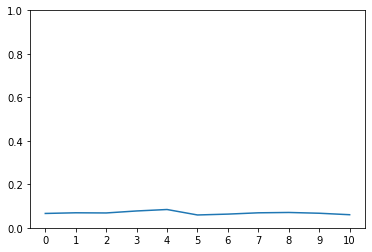

In [652]:
plt.plot([i for i in range(len(posL))],posL)
axes = plt.gca()
axes.set_ylim([0,1])
plt.xticks(np.arange(0, len(posL), 1.0))
plt.show()

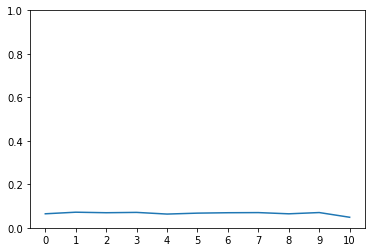

In [653]:
plt.plot([i for i in range(len(posL))],negL)
axes = plt.gca()
axes.set_ylim([0,1])
plt.xticks(np.arange(0, len(posL), 1.0))
plt.show()

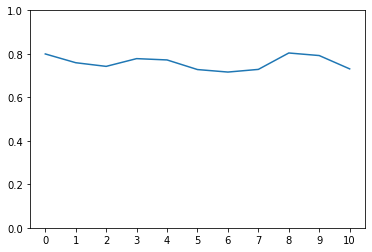

In [654]:
plt.plot([i for i in range(len(posL))],neuL)
axes = plt.gca()
axes.set_ylim([0,1])
plt.xticks(np.arange(0, len(posL), 1.0))
plt.show()

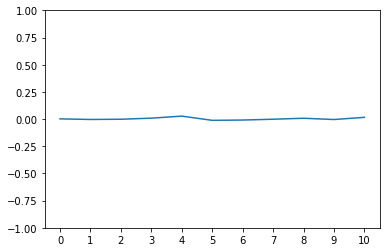

In [655]:
plt.plot([i for i in range(len(posL))],calcL)
axes = plt.gca()
axes.set_ylim([-1,1])
plt.xticks(np.arange(0, len(posL), 1.0))
plt.show()

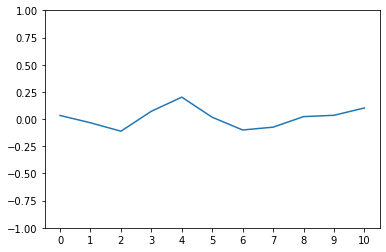

In [656]:
plt.plot([i for i in range(len(posL))],comL)
axes = plt.gca()
axes.set_ylim([-1,1])
plt.xticks(np.arange(0, len(posL), 1.0))
plt.show()

In [583]:
def getHtml(url, body):
    agent = {"User-Agent":'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Ubuntu Chromium/83.0.4103.61 Chrome/83.0.4103.61 Safari/537.36'}
    page = requests.get(url, headers=agent)
    body += [page.text]
    
    
def genAllText(body,synonyms):
    allText = []

    for bod in body:
        soup = BeautifulSoup(bod)
        paragraphs = soup.findAll('p')
        tmpText = ''
        for txt in paragraphs:
            for syn in synonyms.split(','):
                if syn.lower() in str(txt).lower():
                    tmpText += txt.getText()
        tmpText = tmpText.replace('\n',' ')
        allText += [tmpText]
        
    return allText


def genBody(links):
    manager = multiprocessing.Manager()
    body = manager.list()
    
    for url in links:
        p = multiprocessing.Process(target=getHtml, args=(url, body,))
        p.start()
        p.join(4)

        if p.is_alive():
            print("timed out...")

            p.terminate()
            p.join()

            body += ['']

        else:
            print('Requests success!')
            
    return body
            
            
def measureSentiment(allText):
    sia = SentimentIntensityAnalyzer()
    pos = 0
    neg = 0
    neu = 0
    com = 0
    count = 0
    
    print(f'Groups: {len(allText)}')
    for group in allText:
        count += 1
        sentiment = sia.polarity_scores(group)

        pos += sentiment['pos']
        neg += sentiment['neg']
        neu += sentiment['neu']
        com += sentiment['compound']
        print(f'done-{count}')
        
    return pos,neg,neu,com,count


def av_sentiment(pos,neg,neu,com,count):
    return pos/count, neg/count, neu/count, com/count

In [575]:
TXT = """
President Donald Trump will soon head to Oklahoma to bask in a MAGA rally for the first time since March, looking to leave the troubles of Washington behind after a terrible, horrible, no-good, very bad week.

Pundits have declared Trump hitting rock bottom during his "worst week" many times over — 10 different weeks just by the summer of 2017, including Charlottesville — but most of those were the result of self-inflicted crises.

Now, with the coronavirus skyrocketing in at least 14 states and the nation still reeling from the death of George Floyd, Trump's penchant for self-sabotage is colliding with severe and deadly external events.

A majority of Americans think Trump is "exacerbating tensions in a moment of national crisis," according to a new poll from the Associated Press and the NORC Center for Public Affairs Research.

Only 24% of respondents said the country is headed in the right direction, down from 33% in April and 42% in March.

Record unemployment, nearly 120,00 deaths from COVID-19 and nationwide protests were all factors in Trump's polling numbers slipping before this week — even endangering his Electoral College firewall for reelection — and then damaging revelations from John Bolton's book dropped.

On Wednesday, passages from his ex-national security adviser's book came so thick and fast that it was difficult to figure out which one was more damning for the president.

Bolton recalled Trump telling China's president that building concentration camps for Uighur Muslims was "exactly the right thing to do."

Then came the one on Trump calling journalists "scumbags" who should be "executed" for not divulging sources.

Or the one about how it would be "cool" to invade Venezuela. Or the one on Trump trying very hard to get a signed copy of Elton John's "Rocket Man" to Kim Jong Un.

Each of these revelations would have taken up their own proper news cycles under different circumstances, even in the hyperloop of the Trump era.

Yet they were all coming at once, and on top of the virus, social unrest and the viral clip of Trump walking gingerly down a ramp at West Point, reminding the American public how little is actually known about the president's health.

A recent New York Times palace intrigue report from Maggie Haberman and Annie Karni delved further into the president's self-sabotaging behavior, running under the headline "Does Trump Want to Fight for a Second Term? His Self-Sabotage Worries Aides."

While anonymous assessments were offered from sources out of fear of retribution from Trump, one former official went on the record to offer a hyperbolic yet telling prescription.

"He is the modern L.B.J., where everything has gone wrong and none of his skill sets are effective at what's gone wrong," Anthony Scaramucci, Trump's former White House communications director for all of 11 days, told The Times.

Tacking a "worst" onto Trump's week in June 2020 may not help plot the course of his first term when all is said and done, but it's hard to think of one where more things went wrong on more fronts.
"""

In [576]:
sia.polarity_scores(TXT)

{'neg': 0.128, 'neu': 0.852, 'pos': 0.02, 'compound': -0.9955}

In [577]:
(0.02-0.128)/0.852

-0.1267605633802817

In [661]:
','.join(['1','2','3',['1']])

TypeError: sequence item 3: expected str instance, list found